In [18]:
import pandas as pd
import numpy as np
from invertiblewavelets import Transform, LinearFilterBank, DyadicFilterBank
import matplotlib.pyplot as plt
from invertiblewavelets import Cauchy, Morlet
from scipy import signal
from magprime import utility
%matplotlib inline

#### Load Example Data from Swarm A Spacecraft Magnetoemter

In [12]:
data = utility.load_swarm_data(160000,165000)[2]
sample_rate = 50.0                          # 50 Hz sampling rate
num_samples = data.shape[-1]                # 5000 samples
t = np.arange(num_samples) / sample_rate    # time array

c:\Users\aphoffm2\AppData\Local\anaconda3\envs\mag\Lib\site-packages\magprime\utility\data_loader.py:28: DtypeWarning: Columns (2,5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path, sep=',',header=None)


#### Test Cases
1. N = 5000
2. Full or Same
3. Short or Long path

In [13]:
"Filterbank"
fb_long = DyadicFilterBank(wavelet=Morlet(1,2) , fs=sample_rate, N=4000, real=True, s_max = 2, dj = 1/18, compensation=True)
fb_short = DyadicFilterBank(wavelet=Morlet(1,2) , fs=sample_rate, N=6000, real=True, s_max = 2, dj = 1/18, compensation=True)

"Transform"
tf_long = Transform(filterbank=fb_long)
tf_short = Transform(filterbank=fb_short)

#### Plot Wavelet Coefficients

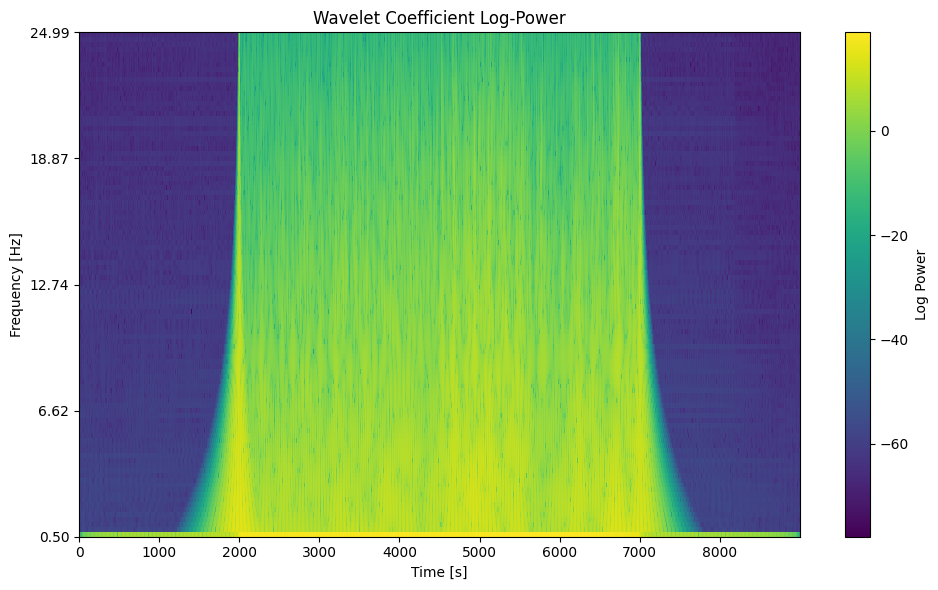

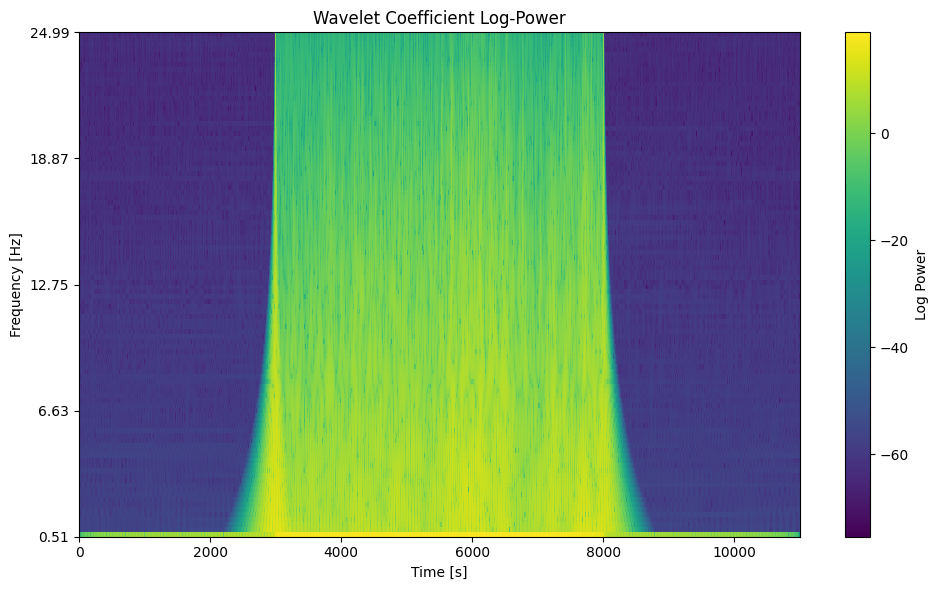

In [14]:
# Perform forward wavelet transform
coefficients = tf_long.forward(data, mode='full')
tf_long.scalogram(coefficients)

coefficients = tf_short.forward(data, mode='full')
tf_short.scalogram(coefficients)

RMSEs:  2.84411097646291 2.8439332307373286


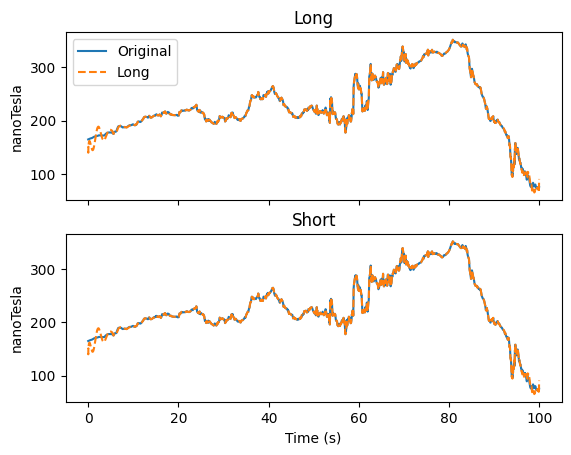

In [17]:
mode = 'same'

"Long path"
c_long = tf_long.forward(data, mode=mode)
r_long = tf_long.inverse(c_long,mode=mode, Lx = 5000)

"Short Path"
c_short = tf_short.forward(data, mode=mode)
r_short = tf_short.inverse(c_short, mode=mode, Lx = 5000)

print("RMSEs: ", np.sqrt(np.mean((data-r_short)**2)), np.sqrt(np.mean((data-r_long)**2)))
%matplotlib inline
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, data, label='Original')
ax[0].plot(t, r_long, label='Long', linestyle='--')    
ax[0].set_ylabel('nanoTesla')
ax[0].legend()
ax[0].set_title('Long')
ax[1].plot(t, data, label='Original')
ax[1].plot(t, r_short, label='short', linestyle='--')
ax[1].set_title('Short')
ax[1].set_ylabel('nanoTesla')
ax[1].set_xlabel('Time (s)')
plt.show()

In [6]:
Sfreq = np.sum(np.abs(tf_short.Wfreq) ** 2, axis=0)

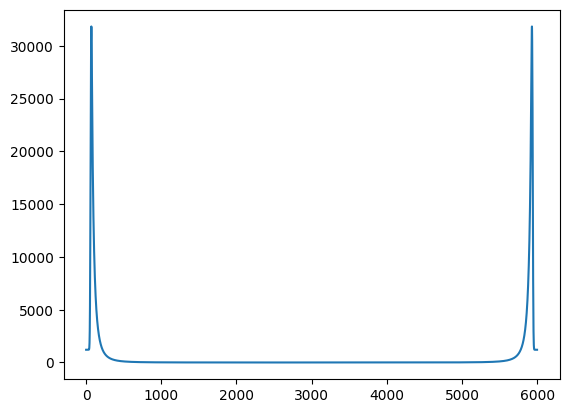

In [7]:
plt.plot(Sfreq)

In [10]:
plt.plot(np.sin(0.5 * np.pi *
                             np.linspace(1.0, 0.0, 1000, endpoint=False)))